In [2]:

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

data = pandas.read_csv('../../data/csv/nesarc_pds.csv', low_memory=False)

In [3]:

#Set PANDAS to show all columns in DataFrame
pandas.set_option('display.max_columns', None)

#Set PANDAS to show all rows in DataFrame
pandas.set_option('display.max_rows', None)

In [4]:

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%f'%x)

In [73]:

#setting variables you will be working with to numeric
data['TAB12MDX'] = pd.to_numeric(data['TAB12MDX'])
data['CHECK321'] = pd.to_numeric(data['CHECK321'])
data['S3AQ3B1'] = pd.to_numeric(data['S3AQ3B1'])
data['S3AQ3C1'] = pd.to_numeric(data['S3AQ3C1'])
data['AGE'] = pd.to_numeric(data['AGE'])

KeyError: 'TAB12MDX'

In [6]:

#subset data to young adults age 18 to 25 who have smoked in the past 12 months
sub1=data[(data['AGE']>=18) & (data['AGE']<=25) & (data['CHECK321']==1)]

In [7]:

#make a copy of my new subsetted data
sub2 = sub1.copy()

In [8]:

#SETTING MISSING DATA
# recode missing values to python missing (NaN)
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, numpy.nan)

# recode missing values to python missing (NaN)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, numpy.nan)

recode1 = {1: 6, 2: 5, 3: 4, 4: 3, 5: 2, 6: 1}
sub2['USFREQ']= sub2['S3AQ3B1'].map(recode1)

recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)

In [9]:

# A secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1']

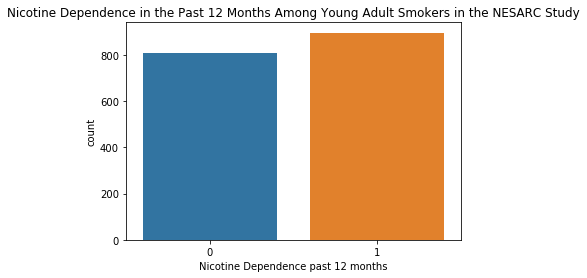

In [11]:

%matplotlib inline

#univariate bar graph for categorical variables
# First hange format from numeric to categorical
sub2["TAB12MDX"] = sub2["TAB12MDX"].astype('category')

seaborn.countplot(x="TAB12MDX", data=sub2)
plt.xlabel('Nicotine Dependence past 12 months')
plt.title('Nicotine Dependence in the Past 12 Months Among Young Adult Smokers in the NESARC Study')

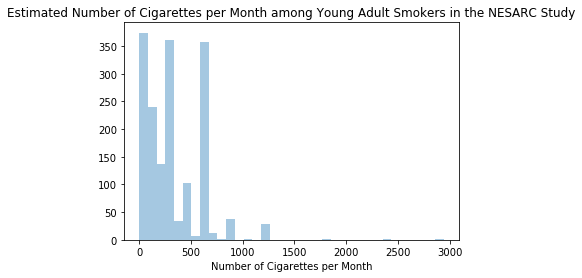

In [12]:

#Univariate histogram for quantitative variable:
seaborn.distplot(sub2["NUMCIGMO_EST"].dropna(), kde=False);
plt.xlabel('Number of Cigarettes per Month')
plt.title('Estimated Number of Cigarettes per Month among Young Adult Smokers in the NESARC Study')

In [13]:

# standard deviation and other descriptive statistics for quantitative variables
print ('describe number of cigarettes smoked per month')
desc1 = sub2['NUMCIGMO_EST'].describe()
print (desc1)

describe number of cigarettes smoked per month
count   1697.000000
mean     320.304361
std      274.436777
min        1.000000
25%       90.000000
50%      300.000000
75%      600.000000
max     2940.000000
Name: NUMCIGMO_EST, dtype: float64


In [14]:

c1= sub2.groupby('NUMCIGMO_EST').size()
print (c1)

NUMCIGMO_EST
1.000000        29
2.000000        14
2.500000        11
3.000000        12
4.000000         2
5.000000        34
6.000000         1
7.500000        12
8.000000         1
10.000000       38
12.500000        9
14.000000        3
15.000000       14
17.500000        1
20.000000       13
22.000000        4
24.000000        1
25.000000       14
28.000000       17
30.000000       25
35.000000        2
42.000000       19
44.000000        9
50.000000        7
56.000000       15
60.000000       28
66.000000       14
70.000000       22
84.000000        3
88.000000        6
90.000000       45
98.000000        1
100.000000       5
110.000000      11
120.000000      46
132.000000       4
140.000000      10
150.000000     108
154.000000       3
176.000000       3
180.000000      47
210.000000      39
220.000000      12
240.000000      36
270.000000       6
280.000000       1
300.000000     350
330.000000       4
360.000000      25
390.000000       7
420.000000       2
450.000000      97

In [15]:

print ('describe nicotine dependence')
desc2 = sub2['TAB12MDX'].describe()
print (desc2)

describe nicotine dependence
count     1706
unique       2
top          1
freq       896
Name: TAB12MDX, dtype: int64


In [16]:

c1= sub2.groupby('TAB12MDX').size()
print (c1)

TAB12MDX
0    810
1    896
dtype: int64


In [17]:

print ('mode')
mode1 = sub2['TAB12MDX'].mode()
print (mode1)

mode
0    1
Name: TAB12MDX, dtype: category
Categories (2, int64): [0, 1]


In [18]:

print ('mean')
mean1 = sub2['NUMCIGMO_EST'].mean()
print (mean1)

mean
320.3043606364172


In [19]:

print ('std')
std1 = sub2['NUMCIGMO_EST'].std()
print (std1)

std
274.4367774906731


In [20]:

print ('min')
min1 = sub2['NUMCIGMO_EST'].min()
print (min1)

min
1.0


In [21]:

print ('max')
max1 = sub2['NUMCIGMO_EST'].max()
print (max1)

max
2940.0


In [22]:

print ('median')
median1 = sub2['NUMCIGMO_EST'].median()
print (median1)

median
300.0


In [23]:

print ('mode')
mode1 = sub2['NUMCIGMO_EST'].mode()
print (mode1)

mode
0   600.000000
dtype: float64


In [24]:

c1= sub2.groupby('TAB12MDX').size()
print (c1)

TAB12MDX
0    810
1    896
dtype: int64


In [25]:

p1 = sub2.groupby('TAB12MDX').size() * 100 / len(data)
print (p1)

TAB12MDX
0   1.879656
1   2.079224
dtype: float64


In [26]:

c2 = sub2.groupby('NUMCIGMO_EST').size()
print (c2)

NUMCIGMO_EST
1.000000        29
2.000000        14
2.500000        11
3.000000        12
4.000000         2
5.000000        34
6.000000         1
7.500000        12
8.000000         1
10.000000       38
12.500000        9
14.000000        3
15.000000       14
17.500000        1
20.000000       13
22.000000        4
24.000000        1
25.000000       14
28.000000       17
30.000000       25
35.000000        2
42.000000       19
44.000000        9
50.000000        7
56.000000       15
60.000000       28
66.000000       14
70.000000       22
84.000000        3
88.000000        6
90.000000       45
98.000000        1
100.000000       5
110.000000      11
120.000000      46
132.000000       4
140.000000      10
150.000000     108
154.000000       3
176.000000       3
180.000000      47
210.000000      39
220.000000      12
240.000000      36
270.000000       6
280.000000       1
300.000000     350
330.000000       4
360.000000      25
390.000000       7
420.000000       2
450.000000      97

In [27]:

p2 = sub2.groupby('NUMCIGMO_EST').size() * 100 / len(data)
print (p2)

NUMCIGMO_EST
1.000000      0.067296
2.000000      0.032488
2.500000      0.025526
3.000000      0.027847
4.000000      0.004641
5.000000      0.078899
6.000000      0.002321
7.500000      0.027847
8.000000      0.002321
10.000000     0.088181
12.500000     0.020885
14.000000     0.006962
15.000000     0.032488
17.500000     0.002321
20.000000     0.030167
22.000000     0.009282
24.000000     0.002321
25.000000     0.032488
28.000000     0.039450
30.000000     0.058014
35.000000     0.004641
42.000000     0.044091
44.000000     0.020885
50.000000     0.016244
56.000000     0.034808
60.000000     0.064976
66.000000     0.032488
70.000000     0.051052
84.000000     0.006962
88.000000     0.013923
90.000000     0.104425
98.000000     0.002321
100.000000    0.011603
110.000000    0.025526
120.000000    0.106746
132.000000    0.009282
140.000000    0.023206
150.000000    0.250621
154.000000    0.006962
176.000000    0.006962
180.000000    0.109066
210.000000    0.090502
220.000000    0.02784

In [28]:

# A secondary variable multiplying the number of days smoked per month and the approx number of cig smoked per day
sub2['PACKSPERMONTH']=sub2['NUMCIGMO_EST'] / 20

c2= sub2.groupby('PACKSPERMONTH').size()
print (c2)

PACKSPERMONTH
0.050000       29
0.100000       14
0.125000       11
0.150000       12
0.200000        2
0.250000       34
0.300000        1
0.375000       12
0.400000        1
0.500000       38
0.625000        9
0.700000        3
0.750000       14
0.875000        1
1.000000       13
1.100000        4
1.200000        1
1.250000       14
1.400000       17
1.500000       25
1.750000        2
2.100000       19
2.200000        9
2.500000        7
2.800000       15
3.000000       28
3.300000       14
3.500000       22
4.200000        3
4.400000        6
4.500000       45
4.900000        1
5.000000        5
5.500000       11
6.000000       46
6.600000        4
7.000000       10
7.500000      108
7.700000        3
8.800000        3
9.000000       47
10.500000      39
11.000000      12
12.000000      36
13.500000       6
14.000000       1
15.000000     350
16.500000       4
18.000000      25
19.500000       7
21.000000       2
22.500000      97
24.000000       5
25.500000       2
27.000000     

In [29]:

sub2['PACKCATEGORY'] = pandas.cut(sub2.PACKSPERMONTH, [0, 5, 10, 20, 30, 147])

# change format from numeric to categorical
sub2['PACKCATEGORY'] = sub2['PACKCATEGORY'].astype('category')

print ('describe PACKCATEGORY')
desc3 = sub2['PACKCATEGORY'].describe()
print (desc3)

describe PACKCATEGORY
count         1697
unique           5
top       (10, 20]
freq           480
Name: PACKCATEGORY, dtype: object


In [30]:

print ('pack category counts')
c7 = sub2['PACKCATEGORY'].value_counts(sort=False, dropna=True)
print(c7)

pack category counts
(0, 5]       431
(5, 10]      232
(10, 20]     480
(20, 30]     467
(30, 147]     87
Name: PACKCATEGORY, dtype: int64


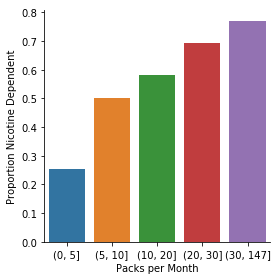

In [43]:

import pandas as pd

sub2['TAB12MDX'] = pd.to_numeric(sub2['TAB12MDX'])

# bivariate bar graph C->Q
seaborn.factorplot(x="PACKCATEGORY", y="TAB12MDX", data=sub2, kind="bar", ci=None)
plt.xlabel('Packs per Month')
plt.ylabel('Proportion Nicotine Dependent')

In [44]:

#creating 3 level smokegroup variable
def SMOKEGRP (row):
   if row['TAB12MDX'] == 1 :
      return 1
   elif row['USFREQMO'] == 30 :
      return 2
   else :
      return 3
         
sub2['SMOKEGRP'] = sub2.apply (lambda row: SMOKEGRP (row),axis=1)

c3= sub2.groupby('SMOKEGRP').size()
print (c3)

SMOKEGRP
1    896
2    521
3    289
dtype: int64


In [45]:

#creating daily smoking vairable
def DAILY (row):
   if row['USFREQMO'] == 30 :
      return 1
   elif row['USFREQMO'] != 30 :
      return 0
      
sub2['DAILY'] = sub2.apply (lambda row: DAILY (row),axis=1)
      
c4= sub2.groupby('DAILY').size()
print (c4)

DAILY
0     386
1    1320
dtype: int64


In [46]:

# you can rename categorical variable values for graphing if original values are not informative 
# first change the variable format to categorical if you haven’t already done so
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')

# second create a new variable (PACKCAT) that has the new variable value labels
sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

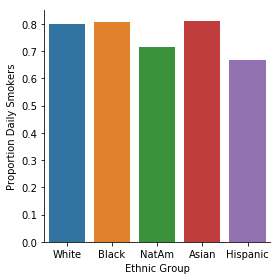

In [47]:

# bivariate bar graph C->C
seaborn.factorplot(x='ETHRACE2A', y='DAILY', data=sub2, kind="bar", ci=None)
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion Daily Smokers')

In [49]:

#check to see if missing data were set to NaN 
print ('counts for S3AQ3C1 with 99 set to NAN and number of missing requested')
c4 = sub2['S3AQ3C1'].value_counts(sort=False, dropna=False)
print(c4)

counts for S3AQ3C1 with 99 set to NAN and number of missing requested
3.000000     114
10.000000    387
20.000000    365
5.000000     163
8.000000      42
1.000000      83
2.000000     111
98.000000      1
30.000000     38
4.000000      84
12.000000     25
nan            9
6.000000      60
13.000000      7
7.000000      45
15.000000     99
40.000000     30
14.000000      3
11.000000      3
60.000000      2
17.000000      2
25.000000     13
16.000000      5
27.000000      1
80.000000      1
9.000000       6
35.000000      1
24.000000      1
19.000000      1
18.000000      3
28.000000      1
Name: S3AQ3C1, dtype: int64


In [50]:

print ('counts for TAB12MDX - past 12 month nicotine dependence')
c5 = sub2['TAB12MDX'].value_counts(sort=False)
print(c5)

counts for TAB12MDX - past 12 month nicotine dependence
0    810
1    896
Name: TAB12MDX, dtype: int64


In [57]:

#GAPMINDER

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

# any additional libraries would be imported here
data = pandas.read_csv('../../data/csv/gapminder.csv', low_memory=False, encoding='iso8859-1')
data.columns = ['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions',
                'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
                'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate']

In [59]:

#setting variables you will be working with to numeric
data['internetuserate'] = pd.to_numeric(data['internetuserate'])
data['urbanrate'] = pd.to_numeric(data['urbanrate'])
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'])
data['hivrate'] = pd.to_numeric(data['hivrate'])

In [60]:

data['incomeperperson']=data['incomeperperson'].replace(' ', numpy.nan)

desc1 = data['urbanrate'].describe()
print (desc1)

count   208.000000
mean     57.136635
std      24.018074
min      10.400000
25%      36.835000
50%      58.700000
75%      74.845000
max     100.000000
Name: urbanrate, dtype: float64


In [61]:

desc2 = data['internetuserate'].describe()
print (desc2)

count   192.000000
mean     35.632716
std      27.780285
min       0.210066
25%       9.999604
50%      31.810121
75%      56.416046
max      95.638113
Name: internetuserate, dtype: float64


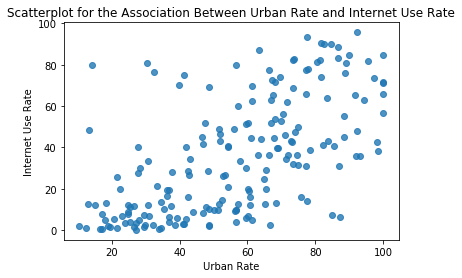

In [62]:

#basic scatterplot:  Q->Q
scat1 = seaborn.regplot(x="urbanrate", y="internetuserate", fit_reg=False, data=data)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate')

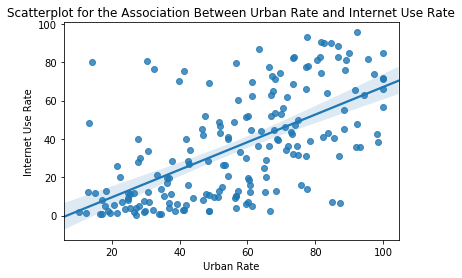

In [63]:

scat2 = seaborn.regplot(x="urbanrate", y="internetuserate", data=data)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate and Internet Use Rate')

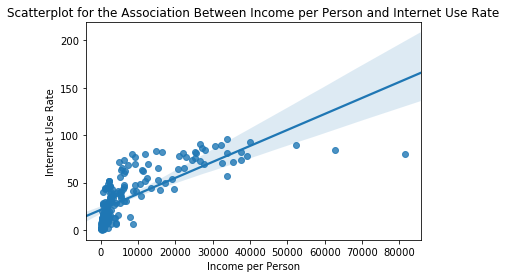

In [64]:

scat3 = seaborn.regplot(x="incomeperperson", y="internetuserate", data=data)
plt.xlabel('Income per Person')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Income per Person and Internet Use Rate')

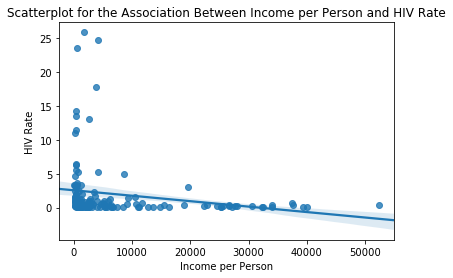

In [65]:

scat4 = seaborn.regplot(x="incomeperperson", y="hivrate", data=data)
plt.xlabel('Income per Person')
plt.ylabel('HIV Rate')
plt.title('Scatterplot for the Association Between Income per Person and HIV Rate')

In [66]:

# quartile split (use qcut function & ask for 4 groups - gives you quartile split)
print ('Income per person - 4 categories - quartiles')
data['INCOMEGRP4']=pandas.qcut(data.incomeperperson, 4, labels=["1=25th%tile","2=50%tile","3=75%tile","4=100%tile"])
c10 = data['INCOMEGRP4'].value_counts(sort=False, dropna=True)
print(c10)

Income per person - 4 categories - quartiles
1=25th%tile    48
2=50%tile      48
3=75%tile      47
4=100%tile     48
Name: INCOMEGRP4, dtype: int64


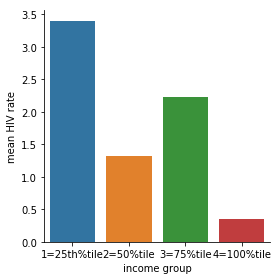

In [67]:

# bivariate bar graph C->Q
seaborn.factorplot(x='INCOMEGRP4', y='hivrate', data=data, kind="bar", ci=None)
plt.xlabel('income group')
plt.ylabel('mean HIV rate')

In [68]:

c11= data.groupby('INCOMEGRP4').size()
print (c11)

INCOMEGRP4
1=25th%tile    48
2=50%tile      48
3=75%tile      47
4=100%tile     48
dtype: int64


In [72]:

data.sort_values(['INCOMEGRP4'], ascending=True)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,INCOMEGRP4
0,ANTARCTIC FISHERIES,nan,nan,nan,nan,143000.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
162,Montserrat,nan,nan,nan,nan,1331000.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
165,Myanmar,nan,0.580000,1.912965,20.200000,322960000.000000,66.500000,0.600000,nan,65.193000,nan,-6.000000,38.005637,10.114997,74.699997,32.580000,NaN
166,NETHERLAND ANTILLES AND ARUBA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
168,Nauru,nan,4.810000,nan,nan,4814333.333300,nan,nan,nan,nan,nan,nan,nan,4.079525,nan,nan,NaN
171,Netherlands Antilles,nan,nan,nan,nan,102538333.330000,47.099998,nan,nan,76.652000,nan,nan,0.000000,nan,53.500000,92.680000,NaN
172,New Caledonia,nan,nan,nan,nan,90269666.667000,nan,nan,nan,76.521000,nan,nan,nan,nan,nan,64.780000,NaN
174,Ngorno-Karabakh,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
178,Niue,nan,8.690000,nan,nan,132000.000000,nan,nan,nan,nan,nan,nan,nan,4.217076,nan,nan,NaN
179,Norfolk Island,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
